In [5]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
dataset=load_iris()
data=pd.DataFrame(dataset['data'],columns=["Petal length","Petal Width","Sepal Length","Sepal Width"])

In [7]:
data['Species']=dataset['target']

In [8]:
data['Species']=data['Species'].apply(lambda x: dataset['target_names'][x])

In [9]:
data.head()

,Petal length,Petal Width,Sepal Length,Sepal Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [10]:
data.shape

(150, 5)

In [11]:
data.describe()

,Petal length,Petal Width,Sepal Length,Sepal Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Petal length  150 non-null    float64
 1   Petal Width   150 non-null    float64
 2   Sepal Length  150 non-null    float64
 3   Sepal Width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [13]:
data.isnull().sum()

Petal length    0
Petal Width     0
Sepal Length    0
Sepal Width     0
Species         0
dtype: int64

[]

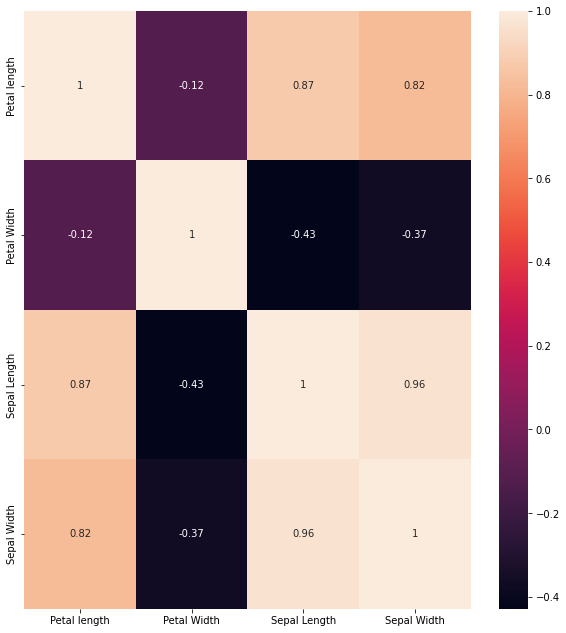

In [14]:
plt.figure(figsize=(10,11))
sns.heatmap(data.corr(),annot=True)
plt.plot()

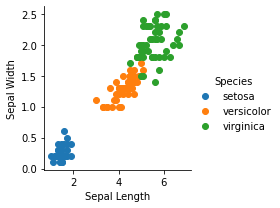

In [15]:
sns.FacetGrid(data,hue="Species")\
.map(plt.scatter,"Sepal Length","Sepal Width")\
.add_legend()
plt.show()

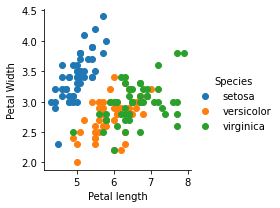

In [16]:
sns.FacetGrid(data,hue="Species")\
.map(plt.scatter,"Petal length","Petal Width")\
.add_legend()
plt.show()

<AxesSubplot:xlabel='Species', ylabel='Petal Width'>

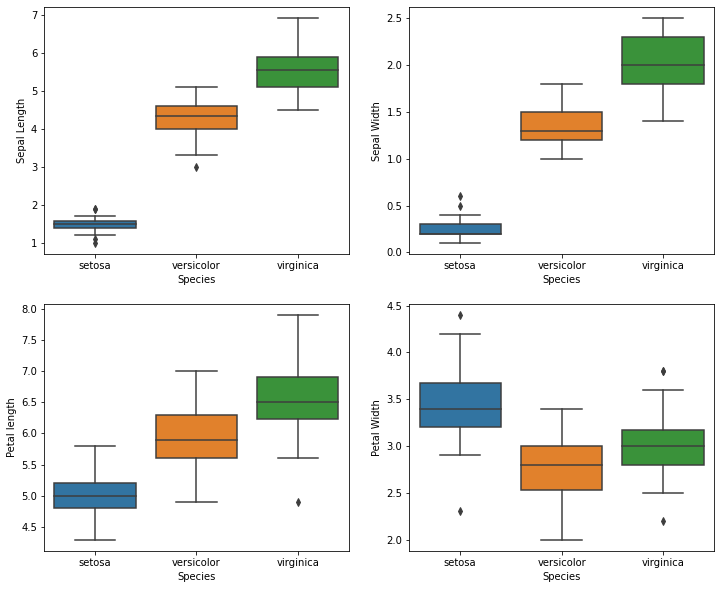

In [17]:
plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
sns.boxplot(x="Species",y="Sepal Length",data=data)
plt.subplot(2,2,2)
sns.boxplot(x="Species",y="Sepal Width",data=data)
plt.subplot(2,2,3)
sns.boxplot(x="Species",y="Petal length",data=data)
plt.subplot(2,2,4)
sns.boxplot(x="Species",y="Petal Width",data=data)

In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import pickle


In [21]:
train,test=train_test_split(data,test_size=0.3)

In [22]:
train.shape, test.shape

((105, 5), (45, 5))

In [23]:
train_X=train[['Sepal Length',"Sepal Width","Petal length","Petal Width"]]
train_y=train.Species

In [24]:
test_X=test[['Sepal Length',"Sepal Width","Petal length","Petal Width"]]
test_y=test.Species

In [26]:
sc = StandardScaler()
train_X = sc.fit_transform(train_X)
test_X= sc.transform(test_X)


In [27]:
classifier = RandomForestClassifier()

In [28]:
classifier.fit(train_X, train_y)

RandomForestClassifier()

In [29]:
pickle.dump(classifier, open("model.pkl", "wb"))